Random variables

In [16]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [17]:
uniform_pdf(0.88)

1

In [18]:
def uniform_cdf(x):
    if x < 0: return 0
    elif x <1: return x
    else: return 1


[0.8142949580425426, 0.6423062840670204, 0.21193286775905018, 0.0713814143503615, 0.44045197465768515, 0.7123646491663561, 0.2289282424918806, 0.9673308145064712, 0.820036882570259, 0.5110163678434989, 0.9883706039554251, 0.8671871895905987, 0.13936467716655787, 0.3779905360197875, 0.5679589703639403, 0.8263551344131425, 0.6584006640792779, 0.004037957247178814, 0.9394975005578302, 0.18350334177323502, 0.5908627107706239, 0.408327656867144, 0.10435155892320702, 0.9347435671639946, 0.07908997880521973, 0.7736551466746372, 0.8294772965302938, 0.7071519890486432, 0.36243833836796846, 0.28145597506844144, 0.9504321122394254, 0.8712435913790405, 0.9420185779739738, 0.37754290701643356, 0.11750120214621473, 0.3223636985247027, 0.932562330950411, 0.8593704582089213, 0.6528250108628713, 0.9643999880297173, 0.7114956522065924, 0.7613720328027387, 0.09081675869661487, 0.6496104986063046, 0.22811075234329437, 0.3089563158990427, 0.6421119473827109, 0.28152792616473143, 0.9725111917680538, 0.18873

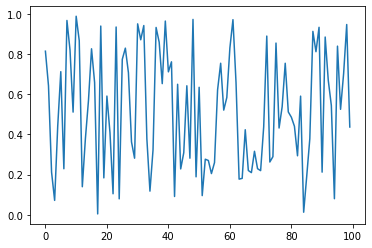

In [19]:
import matplotlib.pyplot as plt

import random as rand

contenedor = []

for x in range (100):
    contenedor.append(rand.uniform(0, 1))

print(contenedor)
plt.plot(contenedor)

In [20]:
import math
def normal_pdf(x, mu=0 , sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return(math.exp(-(x-mu) ** 2 / 2 /sigma ** 2) / (sqrt_two_pi * sigma))

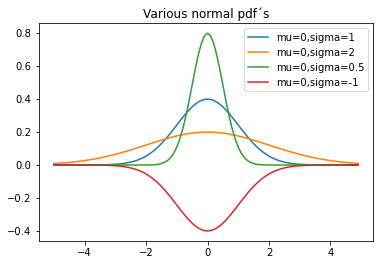

In [21]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],'-',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,sigma=-1) for x in xs],'-',label='mu=0,sigma=-1')
plt.legend()
plt.title("Various normal pdf´s")
plt.show()



In [ ]:
def inverse_normal_cdf(p , mu=0,sigma=1,tolerance=0.00001):
    #busca aproximar la inversa usando busqueda binaria

    #si no es estandar, computa estandar y reescala
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    low_z, low_p = -10.0,0 #normal cdf(-10) es muy cerca a 0
    hi_z , hi_p = 10.0,1    #normal cdf(10) es muy cerca a 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 #consideren el punto medio
        mid_p = normal_cdf(mid_z)   #y el valor de cdf aca
        if mid_p < p:
            #puntomedio aun es muy bajo busca arriba de el
            low_z,low_p = mid_z,mid_p
        elif mid_p > p :
            #punto medio aun es muy alto , buscar abajo de el
            hi_z,hi_p = mid_z,mid_p
        else:
            break
        return mid_z
